# Stock Prediction using Stocker

Stocker ("stock explorer") is a Python-based toolkit for stock analysis and prediction. It is built on the quandl library for financial data, the prophet library from Facebook for additive models, numpy and pandas for data manipulation, and matplotlib for visualization. 

This notebook will document some of the basic capabilities of Stocker for prediction. First, I have to recommend against playing the stock market on a daily basis, with or without Stocker! Primarily I developed this tool to gain more experience with time series analysis and object-oriented programming. To see the code for Stocker, check out stocker.py and to see a notebook with analysis examples, look at the [Stocker Analysis Usage notebook](https://github.com/WillKoehrsen/Data-Analysis/blob/master/stocker/Stocker%20Analysis%20Usage.ipynb). 

In [1]:
# Matplotlib for plotting in the notebook
import matplotlib.pyplot as plt

%matplotlib inline

## Import the Stocker Class

In [2]:
from stocker import Stocker

### Instantiate a Stocker object 

We will be looking at Amazon stock data throughout this example. To retrieve the data, we pass the ticker to the stocker class and assign it to a variable. 

In [3]:
amazon = Stocker('AMZN')

AMZN Stocker Initialized. Data covers 1997-05-16 to 2018-03-27.


The Stocker object has a number of attributes and methods we can use for analysis and prediction. The main methods we will use in this notebook are `Stocker.create_prophet_model(), Stocker.changepoint_prior_analysis(), Stocker.changepoint_prior_validation(), Stocker.evaluate_prediction(),` and `Stocker.predict_future()`.

The most critical attributes for a forecast are `Stocker.changepoint_prior_scale, Stocker.training_years`, and the seasonalities included in the model. 

### Basic Plot of Stock History

We have a little over 20 years of Amazon price history. Let's see what that looks like in its entirety.

Maximum Adj. Close = 1598.39 on 2018-03-12.
Minimum Adj. Close = 1.40 on 1997-05-22.
Current Adj. Close = 1497.05 on 2018-03-27.



C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:190: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  trim_df = df[(df['Date'] >= start_date.date()) &
C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:191: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  (df['Date'] <= end_date.date())]
C:\Users\manas\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The con

           Date     Open     High      Low    Close     Volume  Ex-Dividend  \
0    1997-05-16    22.38    23.75    20.50    20.75  1225000.0          0.0   
1    1997-05-19    20.50    21.25    19.50    20.50   508900.0          0.0   
2    1997-05-20    20.75    21.00    19.63    19.63   455600.0          0.0   
3    1997-05-21    19.25    19.75    16.50    17.13  1571100.0          0.0   
4    1997-05-22    17.25    17.38    15.75    16.75   981400.0          0.0   
5    1997-05-23    16.88    18.25    16.00    18.00  1328100.0          0.0   
6    1997-05-27    17.75    19.75    17.50    19.00   724800.0          0.0   
7    1997-05-28    19.31    19.63    18.38    18.38   381200.0          0.0   
8    1997-05-29    18.50    18.50    17.75    18.06   289400.0          0.0   
9    1997-05-30    18.00    18.13    17.75    18.00   216200.0          0.0   
10   1997-06-02    18.13    18.38    18.00    18.13    49300.0          0.0   
11   1997-06-03    18.38    18.38    17.75    17.75 

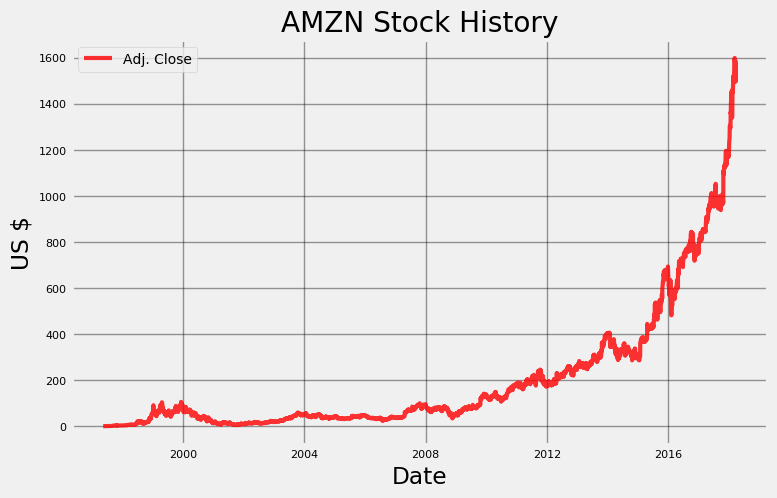

In [4]:
amazon.plot_stock()

Looks predictable right? 

### Plot of Daily Changes

C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:190: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  trim_df = df[(df['Date'] >= start_date.date()) &
C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:191: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  (df['Date'] <= end_date.date())]


Maximum Daily Change = 81.38 on 2018-02-06.
Minimum Daily Change = -79.20 on 2018-02-08.
Current Daily Change = -75.35 on 2018-03-27.

           Date     Open     High      Low    Close     Volume  Ex-Dividend  \
0    1997-05-16    22.38    23.75    20.50    20.75  1225000.0          0.0   
1    1997-05-19    20.50    21.25    19.50    20.50   508900.0          0.0   
2    1997-05-20    20.75    21.00    19.63    19.63   455600.0          0.0   
3    1997-05-21    19.25    19.75    16.50    17.13  1571100.0          0.0   
4    1997-05-22    17.25    17.38    15.75    16.75   981400.0          0.0   
5    1997-05-23    16.88    18.25    16.00    18.00  1328100.0          0.0   
6    1997-05-27    17.75    19.75    17.50    19.00   724800.0          0.0   
7    1997-05-28    19.31    19.63    18.38    18.38   381200.0          0.0   
8    1997-05-29    18.50    18.50    17.75    18.06   289400.0          0.0   
9    1997-05-30    18.00    18.13    17.75    18.00   216200.0          0.0

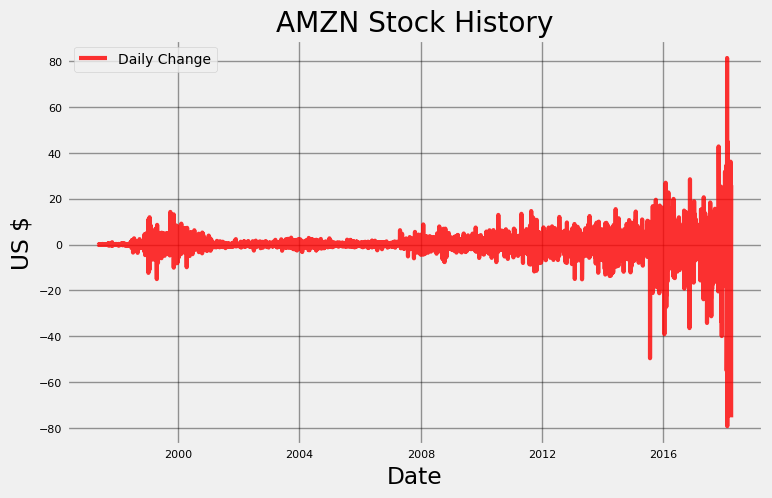

In [5]:
amazon.plot_stock(stats=['Daily Change'])

There have been some extreme changes in absolute magnitude recently, but these are not as large as they seem because the price of the stock has increased. We could change the plot to have percentage change on the y-axis. There do not appear to be trends with regards to the changes in one direction or the other. However, we know the stock has increased in value, so the overall average daily change must be slightly positive. 

## Examine Trends/Patterns

We can create a basic model (with no predictions) trained on the past 3 years of data to inspect any trends and patterns in the data. 

C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:459: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  stock_history = self.stock[self.stock['Date'] > (self.max_date - pd.DateOffset(years = self.training_years)).date()]
C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()


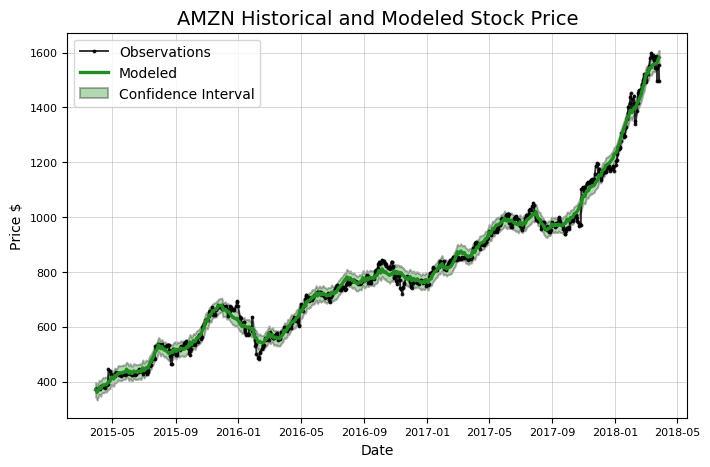

In [6]:
model, model_data = amazon.create_prophet_model()

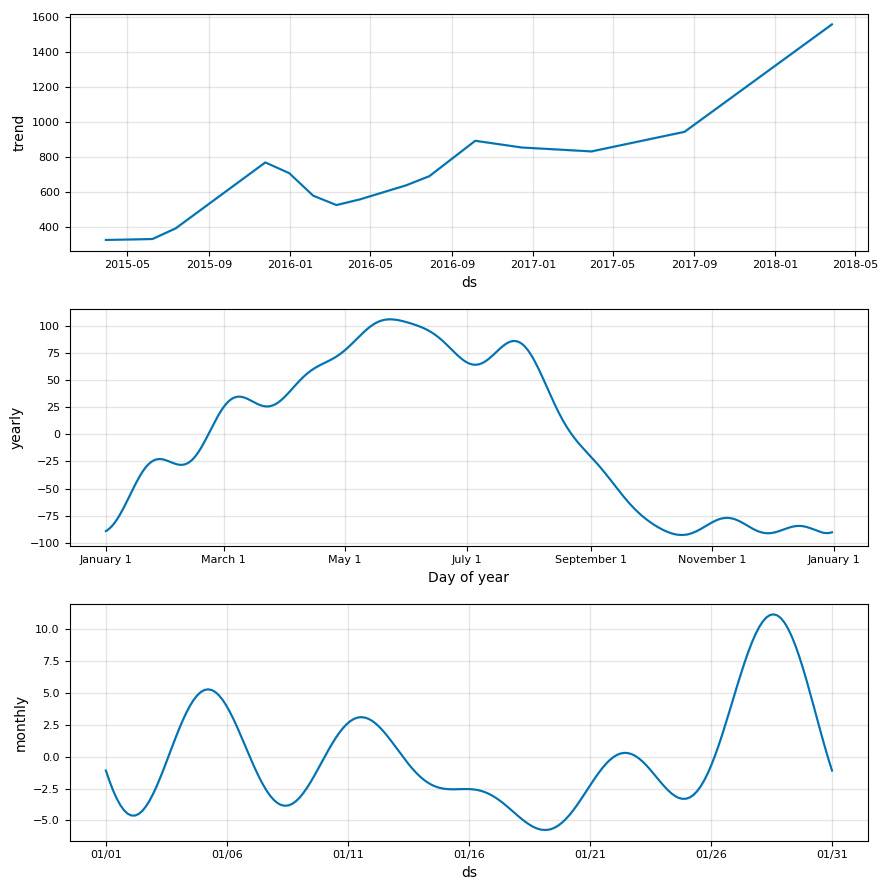

In [7]:
# Variables assigned from previous method call
model.plot_components(model_data)
plt.show()

### Test Addition of a Weekly Seasonality

Although it is unlikely, there might be a significant weekly component which would improve the model. Let's add it in and look at the pattern. 

C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:459: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  stock_history = self.stock[self.stock['Date'] > (self.max_date - pd.DateOffset(years = self.training_years)).date()]
C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()


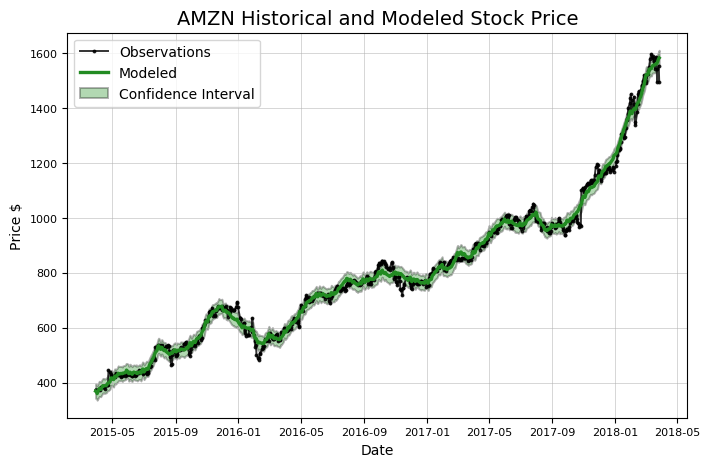

In [8]:
amazon.weekly_seasonality=True
model, model_data = amazon.create_prophet_model()

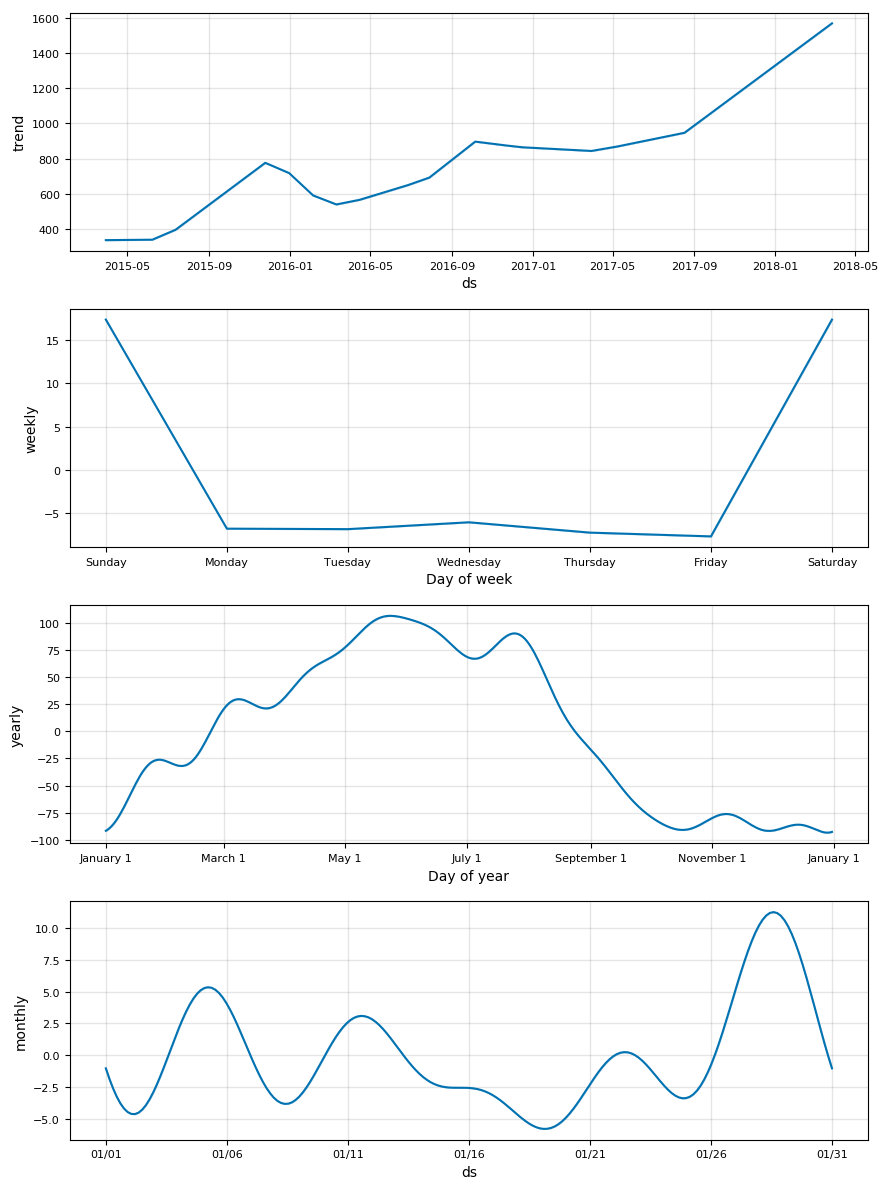

In [9]:
model.plot_components(model_data)
plt.show()

Maybe there is a slight weekly pattern? For now, we can remove that seasonality and then evaluate models with and without it to see the effect on predictions.

In [10]:
amazon.weekly_seasonality=False

# First Predictions

We can make a prediction for any number of specified days using the create model method. The prediction also includes the uncertainty interval, a necessity when making estimates about the future! 

C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:459: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  stock_history = self.stock[self.stock['Date'] > (self.max_date - pd.DateOffset(years = self.training_years)).date()]
C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()


Predicted Price on 2018-04-11 = $1647.47


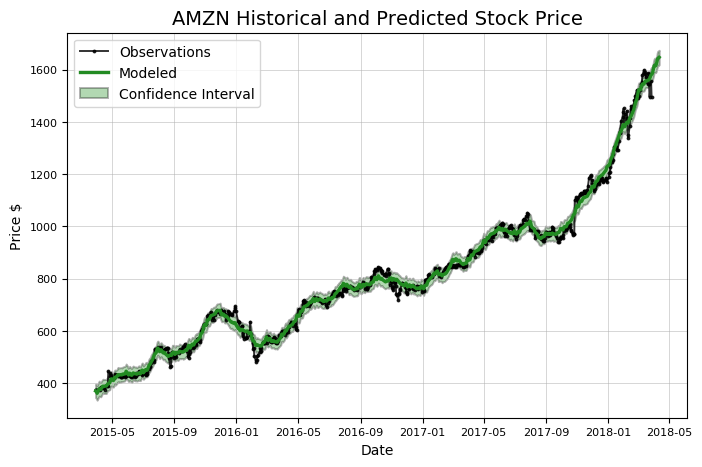

In [11]:
model, model_data = amazon.create_prophet_model(days=15)

The model predicts a continuous increase in price. Notice how the model for both the past data and the future data is smoother than the actual observations. The model smooths out the noise on the small scale in order to make more accurate general predictions over a long period. In other words, an additive model will be more accurate at capturing general movements rather than specific daily fluctuations. 

# Evaluate Model

Anyone can make stock predictions by simply picking a number. For our predictions to be meaningful, we must evaluate them on real data. 

One way to do this is set aside some historical data as a test set and use data from further back as our training set. In the default evaluation method, we test using the past year and train on the 3 years prior to the test period. 

To quantify the accuracy of our predictions, we can find the average dollar error on both the testing and training data, the percentage the actual price was in the predicted confidence interval, and the percentage of times we predicted the correct direction for the stock. 

C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:512: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  train = self.stock[(self.stock['Date'] < start_date.date()) &
C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:513: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  (self.stock['Date'] > (start_date - pd.DateOffset(years=self.training_years)).date())]
C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:516: FutureWarning: Comparing Series of datetim


Prediction Range: 2017-03-27 to 2018-03-27.

Predicted price on 2018-03-24 = $1054.94.
Actual price on    2018-03-23 = $1495.56.

Average Absolute Error on Training Data = $16.86.
Average Absolute Error on Testing  Data = $138.46.

When the model predicted an increase, the price increased 56.41% of the time.
When the model predicted a  decrease, the price decreased  40.22% of the time.

The actual value was within the 80% confidence interval 57.83% of the time.


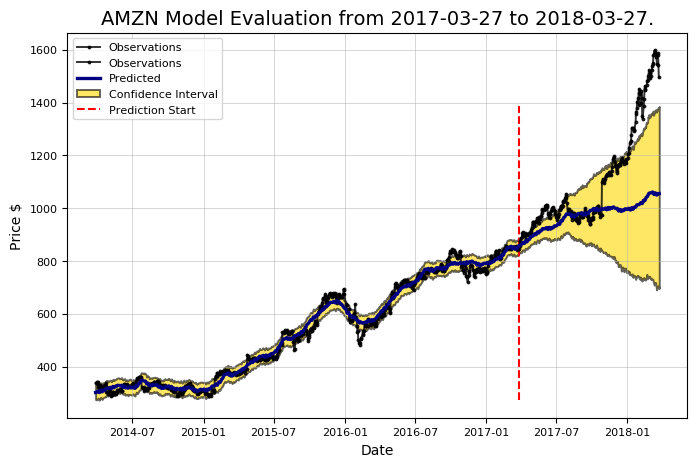

In [12]:
amazon.evaluate_prediction()

These predictions are not very good! However, it is likely that the model hyperparameters (settings) are not optimized for our problem. There are a number of these knobs we can adjust to improve the model, with perhaps the most important the changepoint prior scale, or the amount of weight the model assigns to shifts in the data.

# Changepoint Prior Scale Selection

Changepoints represent where a time series goes from increasing to decreasing or from increasing slowly to increasingly rapidly. They occur at the places with the [greatest change in the rate of the time series](https://facebook.github.io/prophet/docs/trend_changepoints.html). 

The changepoint prior scale represents the amount of weight given to the changepoints in the model. This can be used to control overfitting vs underfitting. A higher prior will create a model with more flexibility and more emphasis on the changepoints. This can lead to overfitting because the model will closely follow the training data. Lowering the prior decreases the model flexibility which can cause the opposite problem underfitting. This occurs when our model does not follow the training data closely enough and fails to learn the underlying relationships.

The Stocker class contains two different ways to choose an appropriate prior: grahically and quantitatively with validation data.

## Graphical Comparison

We will start with a range of four priors to compare. First, we can graphically compare them to get an intuition of how the priors affect the model.  

C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:400: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  train = self.stock[(self.stock['Date'] > (max(self.stock['Date']) - pd.DateOffset(years=self.training_years)).date())]
C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\Users\manas\Anaconda3\lib\site-

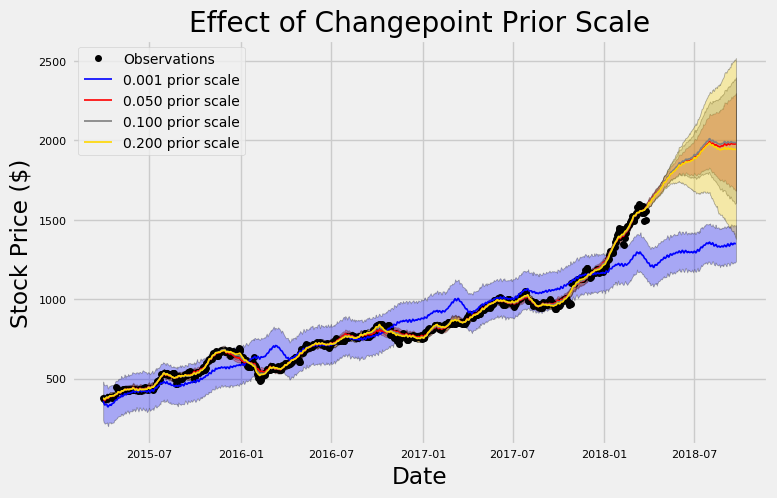

In [13]:
amazon.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])

## Quantitative Comparison

This gives us an idea of how well each prior fits the training data, but no numbers to back up our intuitions. The changepoint prior validation method is designed to provide numerical backing. We are testing from 2017-01-18 to 2018-01-18, so we need to make sure to use a different validation range. We will select two years prior to the testing date range. The model will be trained on the three years prior to the validation period.

C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:933: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  train = self.stock[(self.stock['Date'] > (start_date - pd.DateOffset(years=self.training_years)).date()) &
C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:934: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  (self.stock['Date'] < start_date.date())]
C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:937: FutureWarning: Comparing Series of datetim


Validation Range 2016-04-04 to 2017-04-03.



C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()


     cps  train_err  train_range    test_err  test_range
0  0.001  49.817846   158.115548  156.522883  158.000416
1  0.050  15.627674    51.648169  148.094704  204.465601
2  0.100  12.879212    43.413033   95.986314  341.816007
3  0.200  11.605932    39.723214   80.508257  510.675252


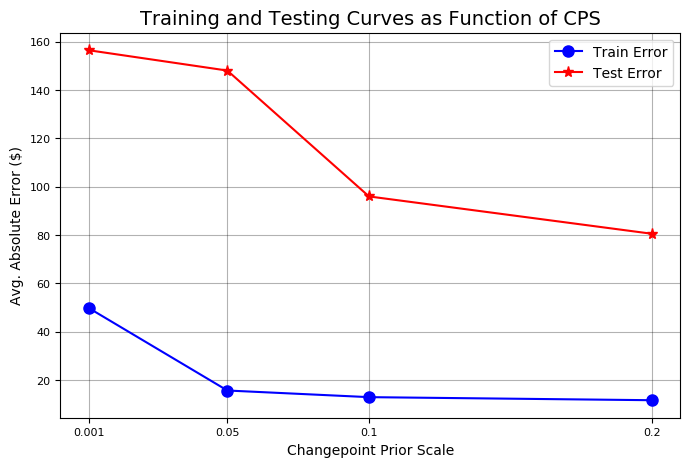

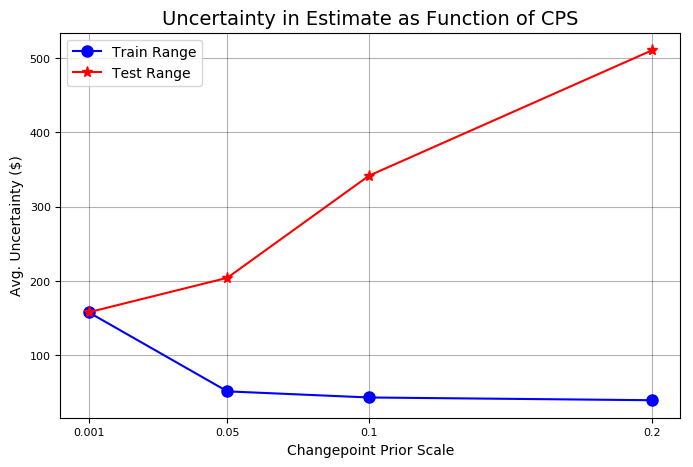

In [14]:
amazon.changepoint_prior_validation(start_date='2016-04-04', end_date='2017-04-03', changepoint_priors=[0.001, 0.05, 0.1, 0.2])

The test error decreases as we increase the prior. Stocks change considerably on a day to day basis, and a more flexible model can account for these fluctuations.

### Refine Search 

We can evaluate additional changepoint prior scales to determine the best fit for our data. 

C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:933: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  train = self.stock[(self.stock['Date'] > (start_date - pd.DateOffset(years=self.training_years)).date()) &
C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:934: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  (self.stock['Date'] < start_date.date())]
C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:937: FutureWarning: Comparing Series of datetim


Validation Range 2016-04-04 to 2017-04-03.



C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\Users\manas\Anaconda3\lib\site-packag

    cps  train_err  train_range    test_err   test_range
0  0.15  12.191203    41.283250   88.894483   442.343920
1  0.20  11.605932    39.686589   80.508257   504.530060
2  0.25  11.348565    38.573316   70.555498   617.348890
3  0.40  10.181684    35.223082   56.870485  1086.129490
4  0.50   9.832410    34.168614  107.671205  1136.828872
5  0.60   9.721561    33.685262  129.158256  1273.476027


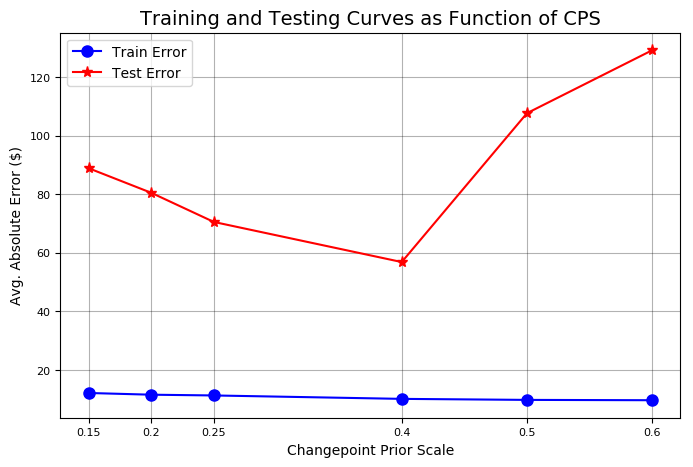

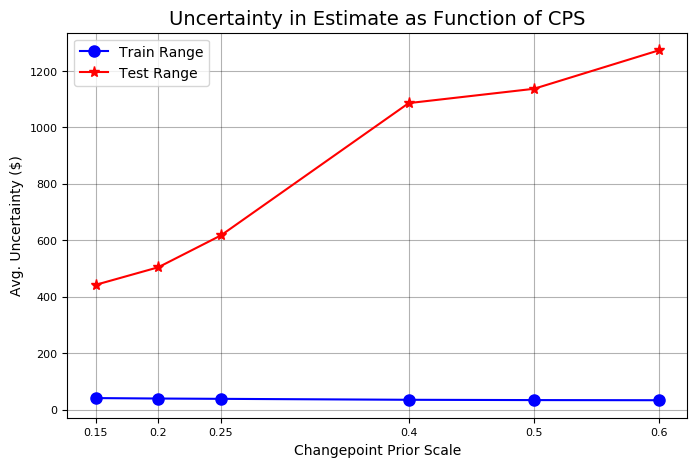

In [15]:
amazon.changepoint_prior_validation(start_date='2016-04-04', end_date='2017-04-03', changepoint_priors=[0.15, 0.2, 0.25,0.4, 0.5, 0.6])

We now assign the changepoint prior with the smallest error on the testing set to the Stocker object. The prior is one of the attiributes and we can change it like any other variable. At this point, we could also change the seasonalities or the amount of training data to achieve the best performance on the testing data

In [16]:
amazon.changepoint_prior_scale = 0.225

### Evaluate Improved Model

C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:512: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  train = self.stock[(self.stock['Date'] < start_date.date()) &
C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:513: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  (self.stock['Date'] > (start_date - pd.DateOffset(years=self.training_years)).date())]
C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:516: FutureWarning: Comparing Series of datetim


Prediction Range: 2017-03-27 to 2018-03-27.

Predicted price on 2018-03-24 = $1044.19.
Actual price on    2018-03-23 = $1495.56.

Average Absolute Error on Training Data = $11.77.
Average Absolute Error on Testing  Data = $149.10.

When the model predicted an increase, the price increased 60.76% of the time.
When the model predicted a  decrease, the price decreased  47.78% of the time.

The actual value was within the 80% confidence interval 87.95% of the time.


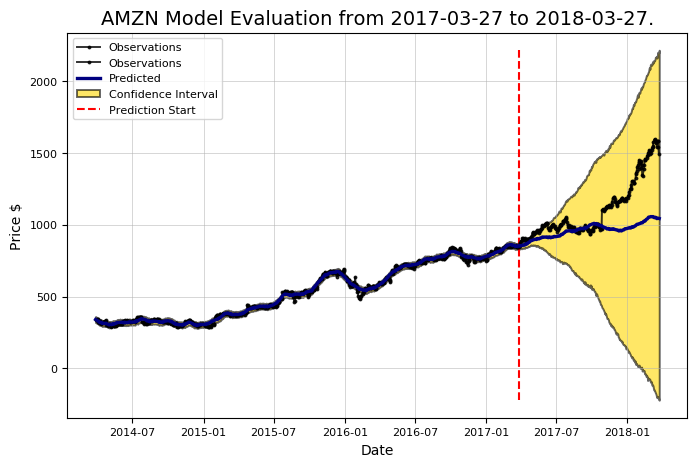

In [17]:
amazon.evaluate_prediction()

#### Add in weekly seasonality and evaluate

In [18]:
amazon.weekly_seasonality=True

C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:512: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  train = self.stock[(self.stock['Date'] < start_date.date()) &
C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:513: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  (self.stock['Date'] > (start_date - pd.DateOffset(years=self.training_years)).date())]
C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:516: FutureWarning: Comparing Series of datetim


Prediction Range: 2017-03-27 to 2018-03-27.

Predicted price on 2018-03-24 = $1017.24.
Actual price on    2018-03-23 = $1495.56.

Average Absolute Error on Training Data = $11.67.
Average Absolute Error on Testing  Data = $151.62.

When the model predicted an increase, the price increased 60.78% of the time.
When the model predicted a  decrease, the price decreased  47.37% of the time.

The actual value was within the 80% confidence interval 89.96% of the time.


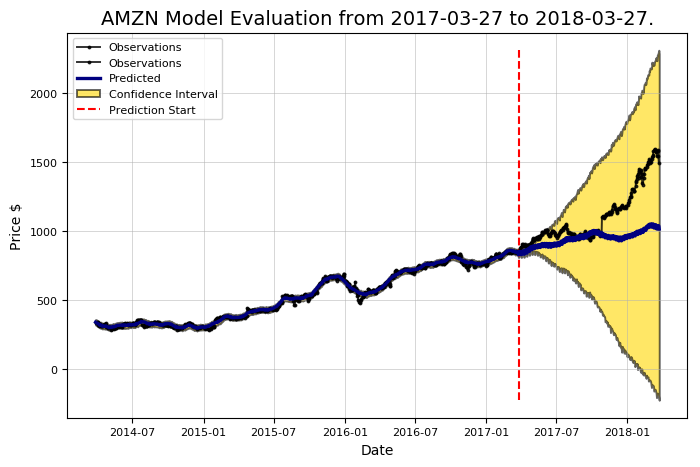

In [19]:
amazon.evaluate_prediction()

The best changepoint prior scale for our model is 0.5 and including the weekly seasonality did not improve the model. Therefore, we will change these settings accordingly. 

In [20]:
amazon.changepoint_prior_scale=0.225
amazon.weekly_seasonality=True

## Play the Daily Market

For fun (this should never be done for real) we can "play" the market with our predictions. We will compare our model with the simple strategy of buying and holding over the same time period. The rules of our game are straightforward:

1. If we predict the price will increase, we buy stock on that day. If we predict a decrease, we do not play the market.
2. If we predicted an increase and the stock does increase, we recieve the change in price of the stock over that day times the number of shares.
3. If we predicted an increase and the stock decreases, we lose the change in price of the stock over that day times the number of shares.

We are assuming the "change in price of a share on that day" is the difference between the previous days' closing price and the closing price on our day. For example, if the closing price on Monday was \$14 and the closing price on Tuesday was \$18, we would call that a \$4 change on Tuesday. This is not entirely accurate as stocks prices change a small amount overnight, but it will be acceptable for our game. Now, let's play with the defaults.

C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:512: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  train = self.stock[(self.stock['Date'] < start_date.date()) &
C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:513: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  (self.stock['Date'] > (start_date - pd.DateOffset(years=self.training_years)).date())]
C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:516: FutureWarning: Comparing Series of datetim

You played the stock market in AMZN from 2017-03-27 to 2018-03-27 with 1000 shares.

When the model predicted an increase, the price increased 60.78% of the time.
When the model predicted a  decrease, the price decreased  47.37% of the time.

The total profit using the Prophet model = $495790.00.
The Buy and Hold strategy profit =         $648740.00.

Thanks for playing the stock market!



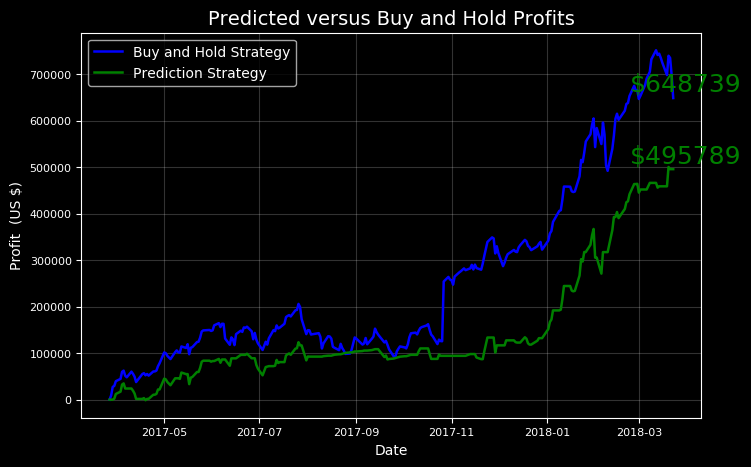

In [21]:
amazon.evaluate_prediction(nshares=1000)

Notice that our profits do not depend on the difference between the final predicted price and the actual price, only on the percentage of the time we correctly predicted the direction. We could alter the rules of the game to play it based on predicted values, but for now we can leave it at the rather simple exercise shown here. 

#### Try a Different Period

We can evaluate any time period we like to see if there are times when we beat the buy and hold strategy. More likely is that we will find times when we lose money. Nonetheless, it is important to test over different time frames to see how robust the model is to training data.

C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:512: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  train = self.stock[(self.stock['Date'] < start_date.date()) &
C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:513: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  (self.stock['Date'] > (start_date - pd.DateOffset(years=self.training_years)).date())]
C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:516: FutureWarning: Comparing Series of datetim

You played the stock market in AMZN from 2007-10-03 to 2009-01-01 with 1000 shares.

When the model predicted an increase, the price increased 45.41% of the time.
When the model predicted a  decrease, the price decreased  60.61% of the time.

The total profit using the Prophet model = $91781.30.
The Buy and Hold strategy profit =         $-22875.00.

Thanks for playing the stock market!



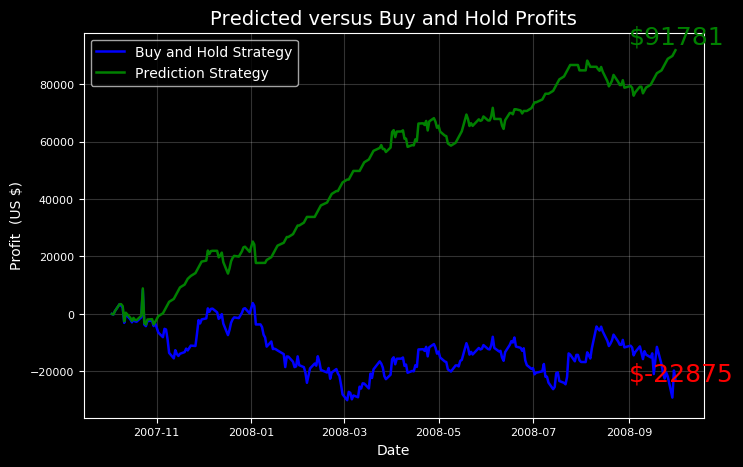

In [26]:
amazon.evaluate_prediction(start_date = '2007-10-03', end_date = '2009-01-01', nshares=1000)

# Predict the Future

As a last step, we can predict any number of days into the future. This function automatically trains on the past 3 years and makes predictions with the uncertainty intervals. 

C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:849: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  train = self.stock[self.stock['Date'] > (max(self.stock['Date']) - pd.DateOffset(years=self.training_years)).date()]
C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:860: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To ret


Predicted Increase: 

         Date     estimate     change        upper        lower
1  2018-03-28  1581.739658   3.390994  1604.553566  1559.316306
2  2018-03-29  1585.155590   3.415932  1607.276303  1562.874685
3  2018-03-30  1592.769388   7.613799  1613.242505  1571.839005
5  2018-04-01  1624.170065  31.400677  1646.882168  1600.990803
8  2018-04-04  1610.804486   1.356964  1634.155899  1588.659539
9  2018-04-05  1614.061531   3.257045  1637.572913  1590.637434
10 2018-04-06  1621.994648   7.933117  1644.697120  1598.924324
12 2018-04-08  1651.528360  29.533712  1676.499901  1629.096868
14 2018-04-10  1638.326153   1.640346  1662.389072  1614.031823
15 2018-04-11  1642.871583   4.545430  1667.902021  1619.127527

Predicted Decrease: 

         Date     estimate     change        upper        lower
6  2018-04-02  1609.636232 -14.533833  1629.830275  1586.912484
7  2018-04-03  1609.447523  -0.188709  1632.397545  1587.301161
13 2018-04-09  1636.685807 -14.842553  1661.700755  1610.8

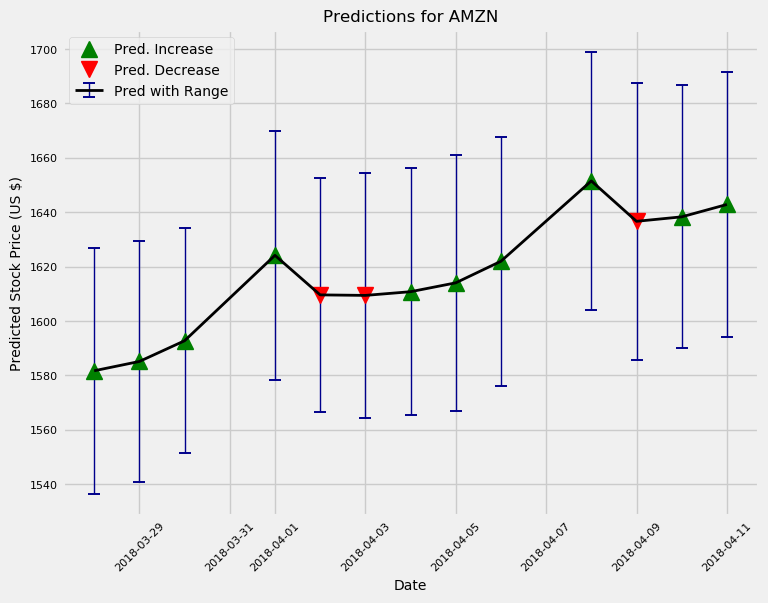

In [23]:
amazon.predict_future(days=15)

C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:849: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  train = self.stock[self.stock['Date'] > (max(self.stock['Date']) - pd.DateOffset(years=self.training_years)).date()]
C:\Users\manas\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\Users\manas\Documents\AI\Projects\Data-Analysis\stocker\stocker.py:860: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To ret


Predicted Increase: 

         Date     estimate     change        upper        lower
1  2018-03-28  1581.739658   3.390994  1604.658141  1560.700700
2  2018-03-29  1585.155590   3.415932  1606.509431  1563.987334
3  2018-03-30  1592.769388   7.613799  1613.405763  1570.302941
5  2018-04-01  1624.170065  31.400677  1646.989907  1603.164920
8  2018-04-04  1610.804486   1.356964  1634.631719  1589.567290
9  2018-04-05  1614.061531   3.257045  1636.930729  1590.466992
10 2018-04-06  1621.994648   7.933117  1642.732734  1599.465621
12 2018-04-08  1651.528360  29.533712  1675.225933  1628.608539
14 2018-04-10  1638.326153   1.640346  1663.571780  1614.928938
15 2018-04-11  1642.871583   4.545430  1669.125939  1618.586551
16 2018-04-12  1648.392263   5.520680  1672.445712  1623.563121
17 2018-04-13  1655.922417   7.530154  1681.799923  1631.266820
19 2018-04-15  1680.252447  24.330030  1705.804968  1656.178371
21 2018-04-17  1667.308737   2.579532  1694.586518  1638.413769
22 2018-04-18  16

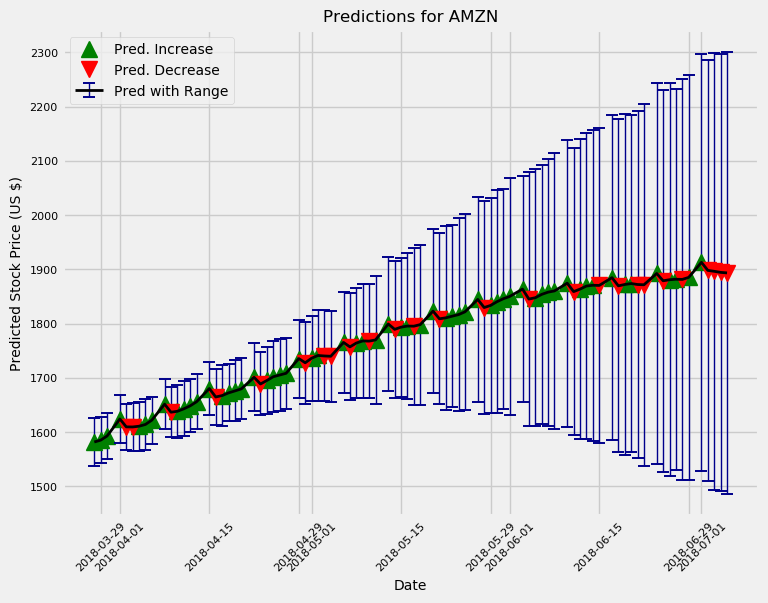

In [24]:
amazon.predict_future(days=100)

The uncertainty increases the farther out in the future we predict. This is to be expected because the initial forecasted values have some uncertainty, and the next values are made based on the previous ones, so the range of possible values grows over time. 

Whenever we make a prediction, we must be sure to include uncertainty intervals because there are no processes that can be exactly estimated in the future. While most people interpret a confidence interval as a lack of confidence, it really displays that we know the limitations of our model. 